# BINARY CLASSIFICATION - PRESSURE DISEASE PREDICTION - ARTIFICIAL NEURAL NETWORK

In [5]:
import warnings
warnings.filterwarnings("ignore")

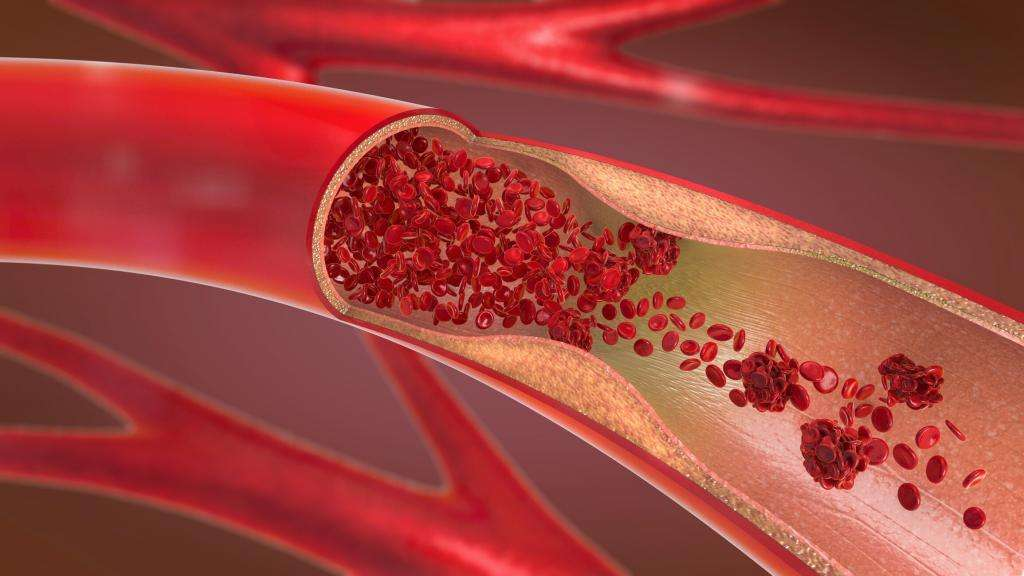

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("pressure_disease.csv")
df.head()

,Unnamed: 0,Number,Gelecouse_rate,Systolic_BP,Diastolic_BP,Heart_Rate,BMI,Target
0,0,39,28.670664,123,108,87,34,1
1,1,65,31.765049,164,61,94,23,1
2,2,44,43.618569,165,73,68,21,1
3,3,46,41.488319,85,97,93,24,1
4,4,42,45.136762,124,51,69,28,0


## EXPLORATORY DATA ANALYSIS (EDA)

In [10]:
df.shape

(200, 8)

In [11]:
df.isnull().sum()

Unnamed: 0        0
Number            0
Gelecouse_rate    0
Systolic_BP       0
Diastolic_BP      0
Heart_Rate        0
BMI               0
Target            0
dtype: int64

In [12]:
df = df = df.drop(['Unnamed: 0','Number'] , axis = 1)
df

,Gelecouse_rate,Systolic_BP,Diastolic_BP,Heart_Rate,BMI,Target
0,28.670664,123,108,87,34,1
1,31.765049,164,61,94,23,1
2,43.618569,165,73,68,21,1
3,41.488319,85,97,93,24,1
4,45.136762,124,51,69,28,0
...,...,...,...,...,...,...
195,23.692067,132,77,82,22,0
196,27.423729,126,70,71,30,0
197,32.880333,120,72,61,25,0
198,43.206512,128,105,88,33,1


In [13]:
df.columns

Index(['Gelecouse_rate', 'Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'BMI',
       'Target'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gelecouse_rate  200 non-null    float64
 1   Systolic_BP     200 non-null    int64  
 2   Diastolic_BP    200 non-null    int64  
 3   Heart_Rate      200 non-null    int64  
 4   BMI             200 non-null    int64  
 5   Target          200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [15]:
df.describe()

,Gelecouse_rate,Systolic_BP,Diastolic_BP,Heart_Rate,BMI,Target
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,36.100008,124.175000,78.800000,73.605000,26.410000,0.540000
std,8.516514,29.071639,17.455183,14.140322,5.047702,0.499648
min,20.323807,80.000000,50.000000,50.000000,18.000000,0.000000
25%,29.575682,99.000000,63.000000,62.750000,22.000000,0.000000
50%,36.080969,123.000000,77.500000,73.000000,26.000000,1.000000
75%,43.772656,147.250000,95.000000,86.000000,31.000000,1.000000
max,49.967301,179.000000,108.000000,99.000000,34.000000,1.000000


In [16]:
df.duplicated().sum()

0

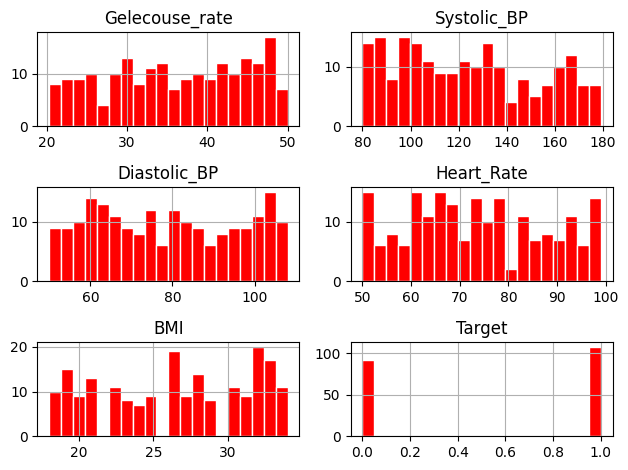

In [17]:
# Spread over the time
df.hist(bins = 20, edgecolor = "white", color = "red")
plt.tight_layout()
plt.show()

In [18]:
# How features are correlated to each other
df.corr(numeric_only = True)

,Gelecouse_rate,Systolic_BP,Diastolic_BP,Heart_Rate,BMI,Target
Gelecouse_rate,1.000000,0.009630,0.018733,-0.063754,-0.036514,-0.006739
Systolic_BP,0.009630,1.000000,-0.089936,0.063906,0.042622,0.490591
Diastolic_BP,0.018733,-0.089936,1.000000,0.097607,0.072968,0.527551
Heart_Rate,-0.063754,0.063906,0.097607,1.000000,-0.025318,0.141297
BMI,-0.036514,0.042622,0.072968,-0.025318,1.000000,0.061208
Target,-0.006739,0.490591,0.527551,0.141297,0.061208,1.000000


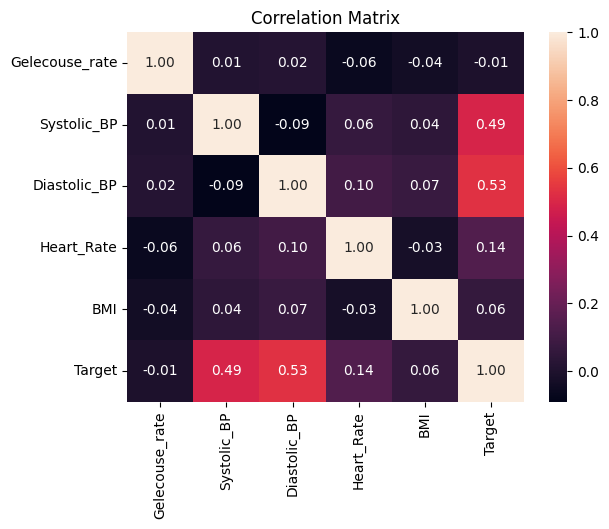

In [19]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "rocket", fmt =".2f")
plt.title("Correlation Matrix")
plt.show()

## NUMERICAL COLUMNS ANALYSIS - INDEPENDENT VARIABLES

In [21]:
features = ['Gelecouse_rate', 'Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'BMI']

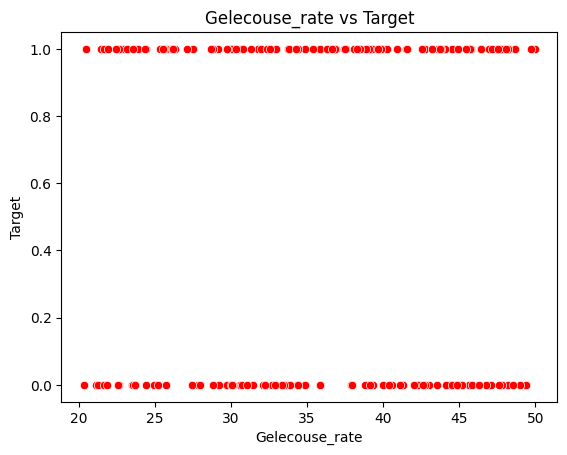

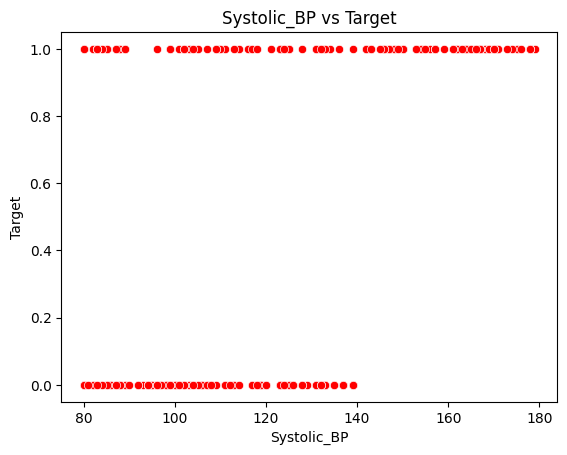

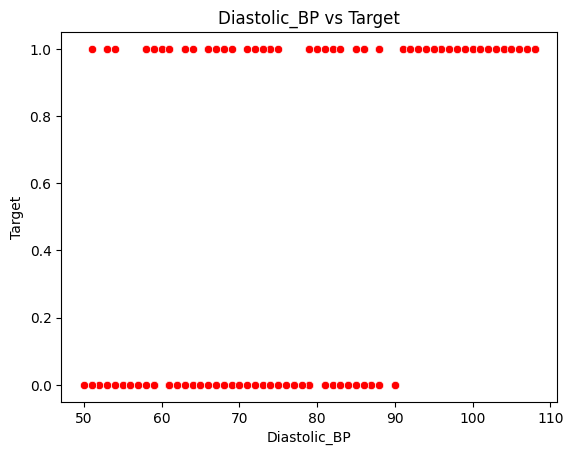

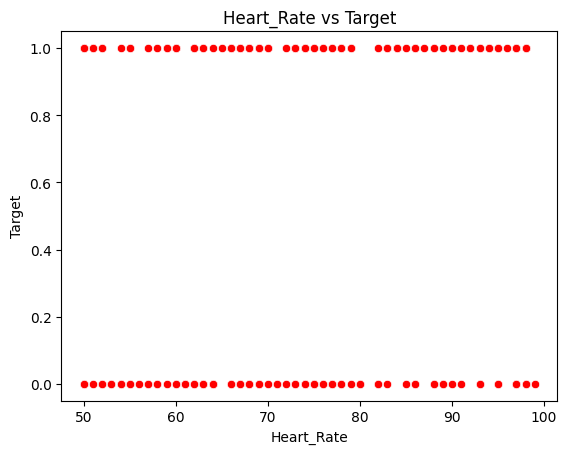

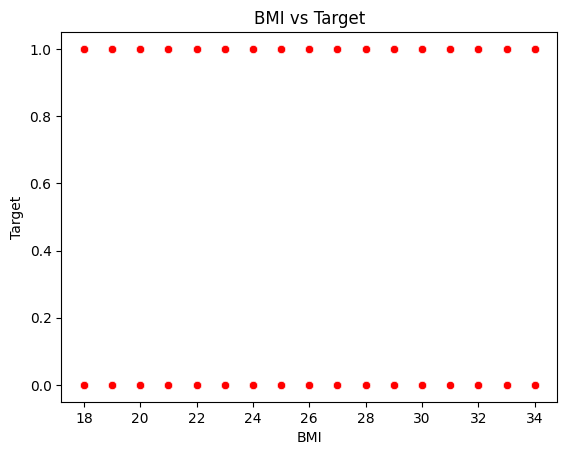

In [22]:
for feature in features:
    sns.scatterplot(data = df, x = feature, y = "Target" , color = "red")
    plt.title(f"{feature} vs Target")
    plt.show()

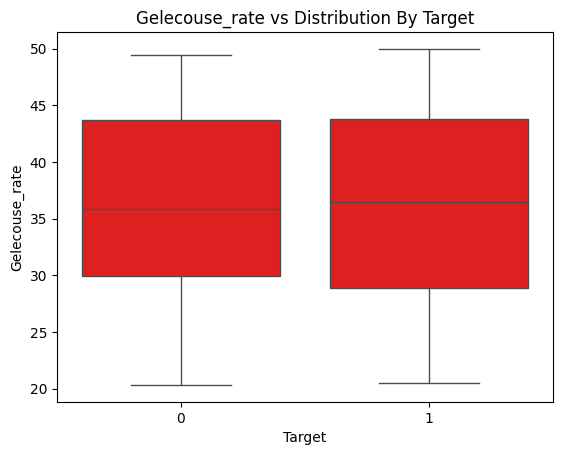

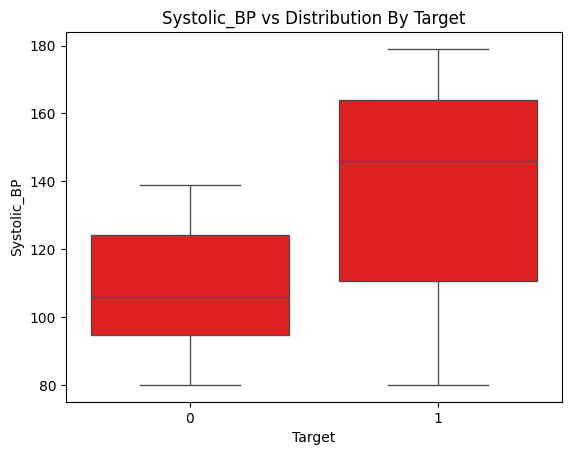

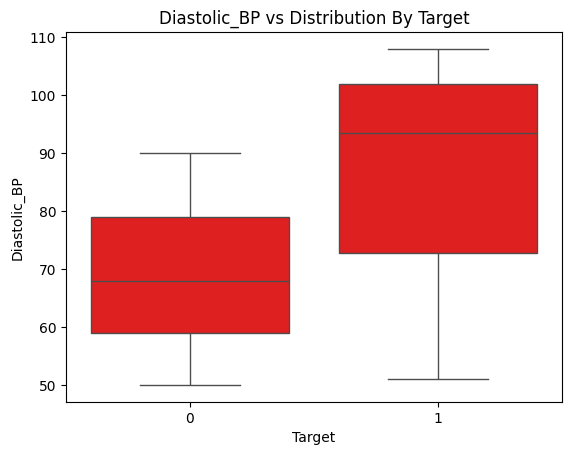

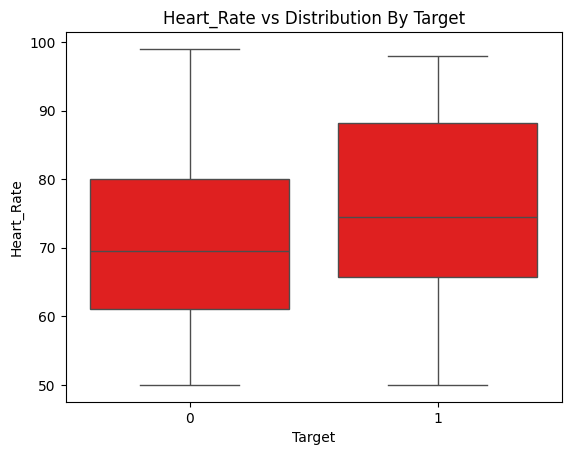

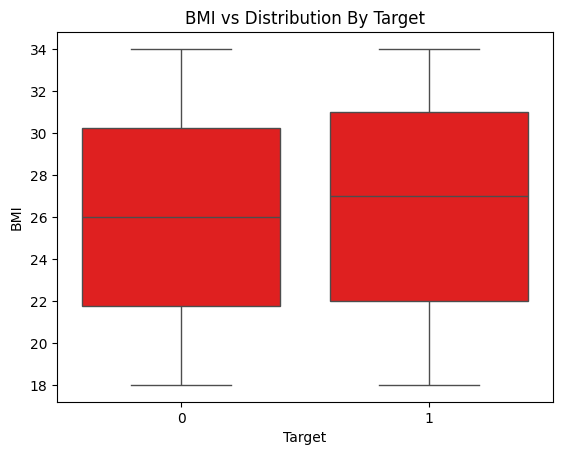

In [23]:
for feature in features:
    sns.boxplot(data = df, x = "Target", y = feature , color = "red")
    plt.title(f"{feature} vs Distribution By Target")
    plt.show()
# Boxplot focuses on summary statistics like mean, quartiles and potential outliers, Clearly shows IQR and any skewness through whiskers and outliers
# Very useful in identifying outliers and comparing median across classes.

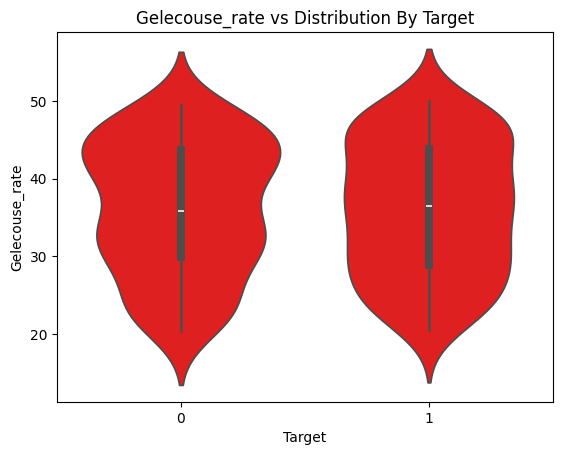

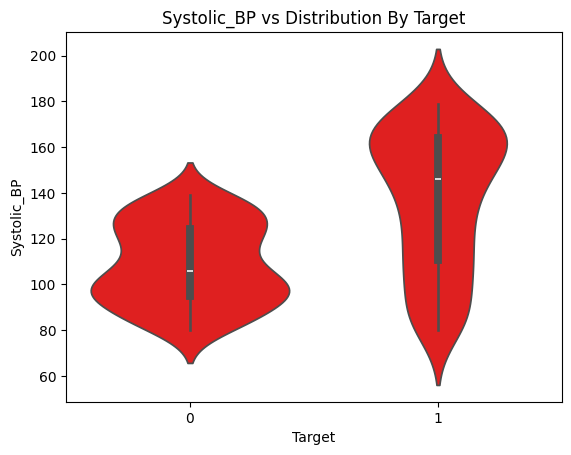

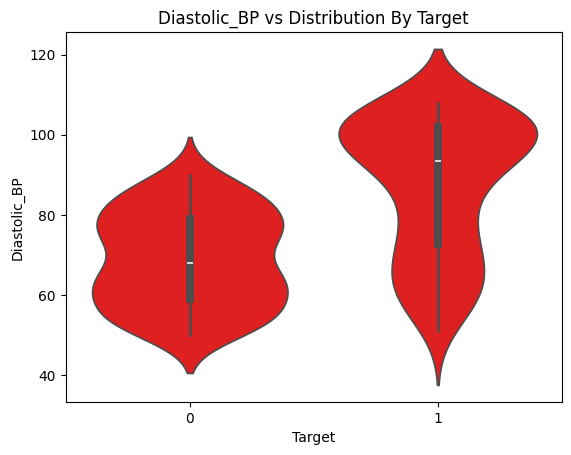

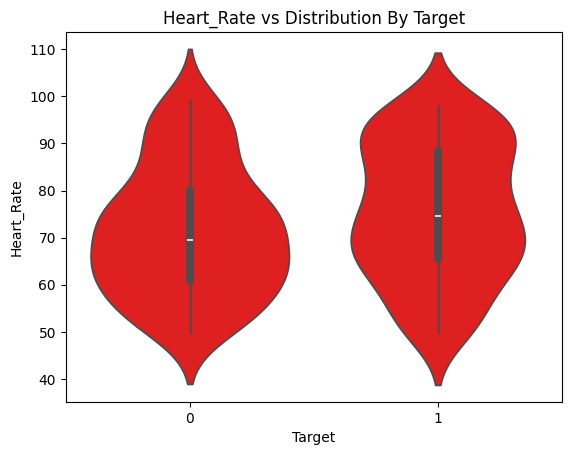

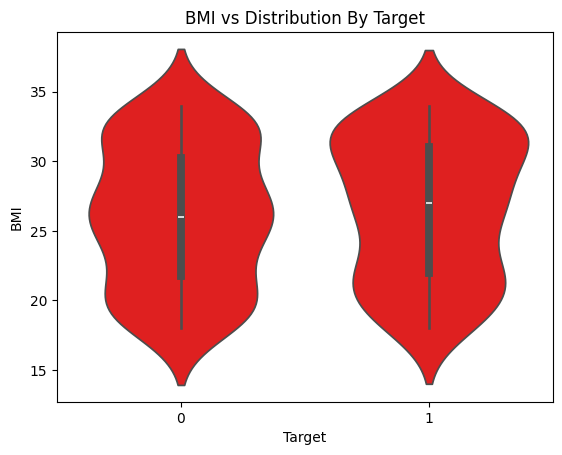

In [24]:
for feature in features:
    sns.violinplot(data = df, x = "Target", y = feature , color = "red")
    plt.title(f"{feature} vs Distribution By Target")
    plt.show() 
    
# Width of Violin plot denotes density, The white dots inside show median, The thick bar in the center shows IQR, The thin line shows rest of the data range.
# Provides distribution range ( density ) in addition to boxplot statistics
# Shows skewness more visually than Boxplot
# Helps to understand how data is concentrated and if it is symmetrical or uneven

# Boxplot & Violinplot together gave a more complex understanding of how features varies with target variable - Useful for identifying patterns and designing better predictive models.

## TARGET VARIABLE ANALYSIS - DEPENDENT VARIABLE

<Axes: xlabel='Target', ylabel='count'>

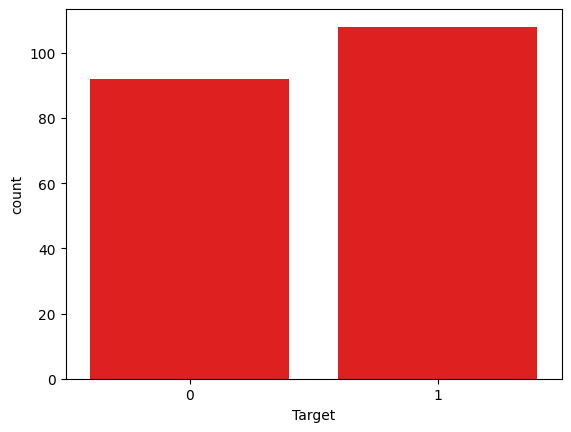

In [26]:
sns.countplot(data = df , x = "Target" , color = "red")

## DATA PREPARATION - FOR TRAINING AND TESTING

In [28]:
# Spliting x and y
x = df.iloc[:,:-1]
x

,Gelecouse_rate,Systolic_BP,Diastolic_BP,Heart_Rate,BMI
0,28.670664,123,108,87,34
1,31.765049,164,61,94,23
2,43.618569,165,73,68,21
3,41.488319,85,97,93,24
4,45.136762,124,51,69,28
...,...,...,...,...,...
195,23.692067,132,77,82,22
196,27.423729,126,70,71,30
197,32.880333,120,72,61,25
198,43.206512,128,105,88,33


In [29]:
y = df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
195    0
196    0
197    0
198    1
199    0
Name: Target, Length: 200, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.2, random_state = 1)

In [31]:
# Preprocessing -- Minmax Scalar
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_minmax = mms.fit_transform(x_train)
x_test_minmax = mms.transform(x_test)
x_train_minmax

array([[0.19046622, 0.8989899 , 0.40350877, 0.35416667, 1.        ],
       [0.52297823, 0.05050505, 0.07017544, 0.54166667, 0.        ],
       [0.78352704, 0.32323232, 0.28070175, 0.8125    , 0.75      ],
       [0.52485422, 0.41414141, 0.94736842, 0.39583333, 0.9375    ],
       [0.47508941, 0.23232323, 0.98245614, 0.25      , 0.0625    ],
       [0.32853815, 0.84848485, 0.80701754, 0.        , 0.875     ],
       [0.18195729, 0.22222222, 1.        , 0.47916667, 0.        ],
       [0.34561953, 0.2020202 , 0.38596491, 0.72916667, 0.875     ],
       [0.16532606, 0.03030303, 0.57894737, 0.39583333, 0.5       ],
       [0.656749  , 0.8989899 , 0.        , 0.41666667, 0.6875    ],
       [0.63278042, 0.81818182, 0.14035088, 0.25      , 0.75      ],
       [0.49158871, 0.1010101 , 0.21052632, 0.        , 0.6875    ],
       [0.43976343, 0.28282828, 0.24561404, 0.89583333, 0.0625    ],
       [0.91685915, 0.67676768, 0.14035088, 0.58333333, 0.0625    ],
       [0.15610784, 0.05050505, 0.

## CREATING MODEL FOR BINARY CLASSIFICATION

In [33]:
import tensorflow as tf

In [34]:
ann = tf.keras.models.Sequential()

In [35]:
# First Hidden Layer
ann.add(tf.keras.layers.Dense(6, activation = "relu"))

In [36]:
# Second Hidden Layer 
ann.add(tf.keras.layers.Dense(6, activation = 'relu'))

In [37]:
# Output Layer
ann.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [38]:
# Compiling the model
ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
# Fit the model
history = ann.fit(x_train_minmax,y_train,batch_size = 32 , epochs = 100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4887 - loss: 0.7133
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4602 - loss: 0.7098 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4507 - loss: 0.7131 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4487 - loss: 0.7154 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4729 - loss: 0.7021
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4414 - loss: 0.7105 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4790 - loss: 0.6986 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5237 - loss: 0.6967
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5245 - loss: 0.6915 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5025 - loss: 0.6927
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5457 - loss: 0.6865 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5076 - los

In [ ]:
print(history.history.keys())

In [ ]:
# Accuracy and Loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'train_acc', color = "red")

# Train accuracy increases steadily and reaches ~ 0.98.
plt.plot(history.history['loss'], label = 'loss', color = "black")
# Train loss keep decreasing.

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Predict
y_pred = (ann.predict(x_test_minmax) > 0.5).astype('int32')
y_pred

In [ ]:
# Predicting New Value
pred = ann.predict(mms.transform([[29.002, 108, 164, 89, 22]]))

if (pred) > 0.5:
    print(1)
else:
    print(0)
    
print(pred)

## PERFORMANCE EVALUATION

In [ ]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
cm = print(confusion_matrix(y_test,y_pred))
cm

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Confusion Matrix Display
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt = "d", cmap = "rocket", cbar = True, linewidth = 0.5, linecolor = "black")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test,y_pred))

In [ ]:
# Summary
ann.summary()

In [ ]:
# Evaluate the Model
ann.evaluate(x_test_minmax,y_test)

In [ ]:
# Save the Model
ann.save("pressure_disease_prediction_model.keras")